In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data] 

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_tvshows = pd.read_csv(path + 'otttvshows.csv')
 
df_tvshows.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18+   6.9             94%       NaN   
1   2         Philadelphia  1993  13+   8.8             80%       NaN   
2   3                 Roma  2018  18+   8.7             93%       NaN   
3   4                  Amy  2015  18+   7.0             87%       NaN   
4   5  The Young Offenders  2016  NaN   8.0            100%       NaN   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country Language  \
0      Action,Drama,Sci-Fi,Thriller                 United States  English   
1                            Comedy                 United States  English   
2  Action,Drama,History,Romance,War  United Kingdom,United States  English   
3                             Drama                 United States  English   
4                            Comedy        United Kingdom,Ireland  English   

                                            Plotline  Runtime       Kind  \
0  Set seven years after the world has become a f...     60.0  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...     22.0  tv series   
2  In this British historical drama, the turbulen...     52.0  tv series   
3  A family drama focused on three generations of...     60.0  tv series   
4                                                NaN     30.0  tv series   

   Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0      3.0        1     0            0        0     1  
1     18.0        1     0            0        0     1  
2      2.0        1     0            0        0     1  
3      6.0        1     0            1        1     1  
4      3.0        1     0            0        0     1

In [6]:
# profile = ProfileReport(df_tvshows)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  5432
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
**************

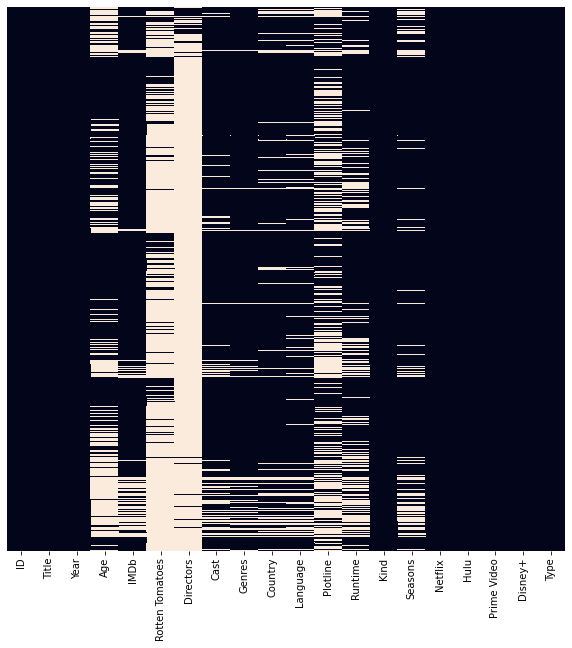

In [8]:
data_investigate(df_tvshows)

In [9]:
# ID
# df_tvshows = df_tvshows.drop(['ID'], axis = 1)
 
# Age
df_tvshows.loc[df_tvshows['Age'].isnull() & df_tvshows['Disney+'] == 1, "Age"] = '13'
# df_tvshows.fillna({'Age' : 18}, inplace = True)
df_tvshows.fillna({'Age' : 'NR'}, inplace = True)
df_tvshows['Age'].replace({'all': '0'}, inplace = True)
df_tvshows['Age'].replace({'7+': '7'}, inplace = True)
df_tvshows['Age'].replace({'13+': '13'}, inplace = True)
df_tvshows['Age'].replace({'16+': '16'}, inplace = True)
df_tvshows['Age'].replace({'18+': '18'}, inplace = True)
# df_tvshows['Age'] = df_tvshows['Age'].astype(int)
 
# IMDb
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].mean()}, inplace = True)
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].median()}, inplace = True)
df_tvshows.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].astype(int)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].mean()}, inplace = True)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].median()}, inplace = True)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'].astype(int)
df_tvshows.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Casts
# df_tvshows = df_tvshows.drop(['Casts'], axis = 1)
df_tvshows.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_tvshows.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_tvshows.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_tvshows.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_tvshows.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_tvshows.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_tvshows.fillna({'Runtime' : df_tvshows['Runtime'].mean()}, inplace = True)
# df_tvshows['Runtime'] = df_tvshows['Runtime'].astype(int)
df_tvshows.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_tvshows.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_tvshows.fillna({'Type': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Type'], axis = 1)
 
# Seasons
# df_tvshows.fillna({'Seasons': 1}, inplace = True)
df_tvshows.fillna({'Seasons': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Seasons'], axis = 1)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
# df_tvshows.fillna({'Seasons' : df_tvshows['Seasons'].mean()}, inplace = True)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
 
# Service Provider
df_tvshows['Service Provider'] = df_tvshows.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_tvshows.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_tvshows.dropna(how = 'any', inplace = True)
df_tvshows.drop_duplicates(inplace = True)

No of Rows :  5432
No of Coloums :  21
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Seasons             object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
S

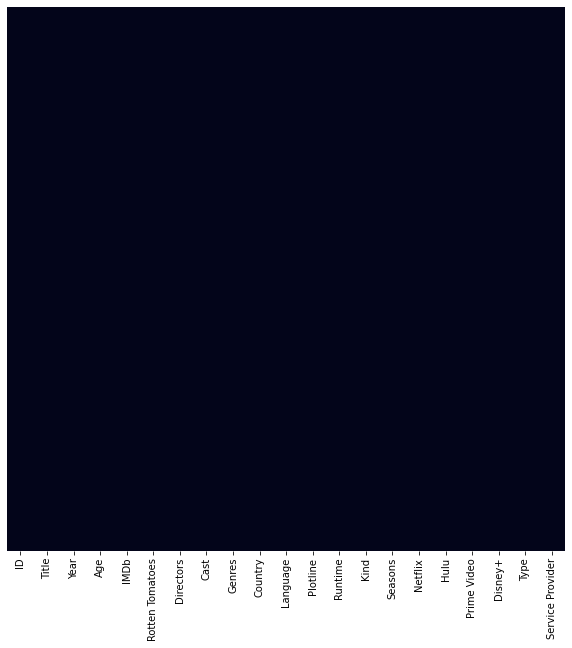

In [10]:
data_investigate(df_tvshows)

In [11]:
df_tvshows.head()

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

                                            Plotline Runtime       Kind  \
0  Set seven years after the world has become a f...      60  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...      22  tv series   
2  In this British historical drama, the turbulen...      52  tv series   
3  A family drama focused on three generations of...      60  tv series   
4                                                 NA      30  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3       1     0            0        0     1           Netflix  
1      18       1     0            0        0     1           Netflix  
2       2       1     0            0        0     1           Netflix  
3       6       1     0            1        1     1           Netflix  
4       3       1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [12]:
df_tvshows.describe()

ID         Year      Netflix         Hulu  Prime Video  \
count  5432.000000  5432.000000  5432.000000  5432.000000  5432.000000   
mean   2716.500000  2010.668446     0.341311     0.293999     0.403351   
std    1568.227662    11.726176     0.474193     0.455633     0.490615   
min       1.000000  1901.000000     0.000000     0.000000     0.000000   
25%    1358.750000  2009.000000     0.000000     0.000000     0.000000   
50%    2716.500000  2014.000000     0.000000     0.000000     0.000000   
75%    4074.250000  2017.000000     1.000000     1.000000     1.000000   
max    5432.000000  2020.000000     1.000000     1.000000     1.000000   

           Disney+    Type  
count  5432.000000  5432.0  
mean      0.033689     1.0  
std       0.180445     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max       1.000000     1.0

In [13]:
df_tvshows.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.031346 -0.646330  0.034293     0.441264  0.195409   
Year        -0.031346  1.000000  0.222316 -0.065807    -0.198675 -0.022741   
Netflix     -0.646330  0.222316  1.000000 -0.366515    -0.515086 -0.119344   
Hulu         0.034293 -0.065807 -0.366515  1.000000    -0.377374 -0.075701   
Prime Video  0.441264 -0.198675 -0.515086 -0.377374     1.000000 -0.151442   
Disney+      0.195409 -0.022741 -0.119344 -0.075701    -0.151442  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_tvshows.sort_values('Year', ascending = True)
# df_tvshows.sort_values('IMDb', ascending = False)

In [15]:
# df_tvshows.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_otttvshows.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_tvshows = pd.read_csv(path + 'updated_otttvshows.csv')
 
# udf_tvshows

In [16]:
# df_netflix_tvshows = df_tvshows.loc[(df_tvshows['Netflix'] > 0)]
# df_hulu_tvshows = df_tvshows.loc[(df_tvshows['Hulu'] > 0)]
# df_prime_video_tvshows = df_tvshows.loc[(df_tvshows['Prime Video'] > 0)]
# df_disney_tvshows = df_tvshows.loc[(df_tvshows['Disney+'] > 0)]

In [17]:
df_netflix_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 1) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_hulu_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 1) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_prime_video_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 1 ) & (df_tvshows['Disney+'] == 0)]
df_disney_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 1)]

In [18]:
df_tvshows_casts = df_tvshows.copy()

In [19]:
df_tvshows_casts.drop(df_tvshows_casts.loc[df_tvshows_casts['Cast'] == "NA"].index, inplace = True)
# df_tvshows_casts = df_tvshows_casts[df_tvshows_casts.Cast != "NA"]
# df_tvshows_casts['Cast'] = df_tvshows_casts['Cast'].astype(str)

In [20]:
df_tvshows_count_casts = df_tvshows_casts.copy()

In [21]:
df_tvshows_cast = df_tvshows_casts.copy()

In [22]:
# Create casts dict where key=name and value = number of casts
 
casts = {}
 
for i in df_tvshows_count_casts['Cast'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        casts[i] = len(i.split(','))
    else:
        casts[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_count_casts['Number of Casts'] = df_tvshows_count_casts['Cast'].map(casts).astype(int)

In [23]:
df_tvshows_mixed_casts = df_tvshows_count_casts.copy()

In [24]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_casts_tvshows = df_tvshows_count_casts.loc[df_tvshows_count_casts['Netflix'] == 1]
hulu_casts_tvshows = df_tvshows_count_casts.loc[df_tvshows_count_casts['Hulu'] == 1]
prime_video_casts_tvshows = df_tvshows_count_casts.loc[df_tvshows_count_casts['Prime Video'] == 1]
disney_casts_tvshows = df_tvshows_count_casts.loc[df_tvshows_count_casts['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

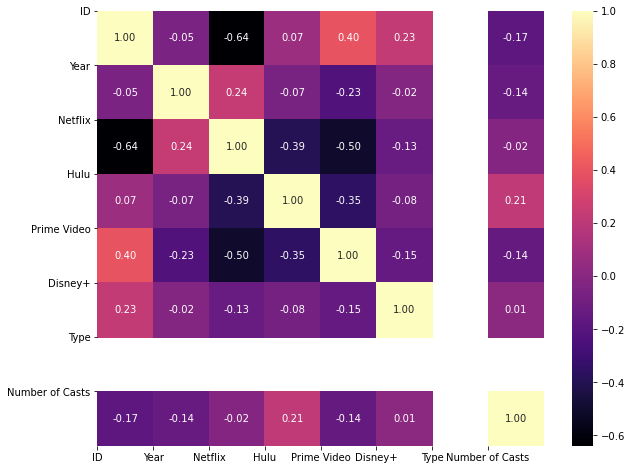

In [25]:
plt.figure(figsize = (10, 10))
corr = df_tvshows_count_casts.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_casts_most_tvshows = df_tvshows_count_casts.sort_values(by = 'Number of Casts', ascending = False).reset_index()
df_casts_most_tvshows = df_casts_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_casts['Number of Casts'] == (df_tvshows_count_casts['Number of Casts'].max()))
# df_casts_most_tvshows = df_tvshows_count_casts[filter]
 
# mostest_rated_tvshows = df_tvshows_count_casts.loc[df_tvshows_count_casts['Number of Casts'].idxmax()]
 
print('\nTV Shows with Highest Ever Number of Casts are : \n')
df_casts_most_tvshows.head(5)


TV Shows with Highest Ever Number of Casts are : 



ID                                     Title  Year Age IMDb  \
0  5191                            The French Gun  2018  16   NA   
1     1                               Snowpiercer  2013  18  6.9   
2  2735                          Dirty Sexy Money  2007   7  7.2   
3  2723                              The Practice  1997   7  7.7   
4  2725  The Secret Life of the American Teenager  2008  16    5   

  Rotten Tomatoes     Directors  \
0              NA  Wes Anderson   
1              94            NA   
2              68            NA   
3              NA            NA   
4              NA            NA   

                                                Cast  \
0  Saoirse Ronan,Frances McDormand,Adrien Brody,T...   
1  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
2  Peter Krause,Donald Sutherland,William Baldwin...   
3  Steve Harris,Camryn Manheim,Michael Badalucco,...   
4  Shailene Woodley,Ken Baumann,Daren Kagasoff,Me...   

                                 Genres                Country  ... Runtime  \
0                  Comedy,Drama,Romance  Germany,United States  ...     103   
1          Action,Drama,Sci-Fi,Thriller          United States  ...      60   
2                                 Drama          United States  ...      45   
3  Crime,Drama,Mystery,Romance,Thriller          United States  ...      60   
4           Comedy,Drama,Family,Romance          United States  ...      43   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series      NA       0    0            1        0     1   
1  tv series       3       1    0            0        0     1   
2  tv series       2       0    1            0        0     1   
3  tv series       8       0    1            0        0     1   
4  tv series       5       0    1            0        0     1   

   Service Provider  Number of Casts  
0       Prime Video               53  
1           Netflix               50  
2              Hulu               50  
3              Hulu               50  
4              Hulu               50  

[5 rows x 22 columns]

In [27]:
fig = px.bar(y = df_casts_most_tvshows['Title'][:15],
             x = df_casts_most_tvshows['Number of Casts'][:15], 
             color = df_casts_most_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Highest Number of Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_casts_least_tvshows = df_tvshows_count_casts.sort_values(by = 'Number of Casts', ascending = True).reset_index()
df_casts_least_tvshows = df_casts_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_casts['Number of Casts'] == (df_tvshows_count_casts['Number of Casts'].min()))
# df_casts_least_tvshows = df_tvshows_count_casts[filter]

print('\nTV Shows with Lowest Ever Number of Casts are : \n')
df_casts_least_tvshows.head(5)


TV Shows with Lowest Ever Number of Casts are : 



ID                                              Title  Year Age IMDb  \
0  3656                                     Struggle Meals  2017   0  8.7   
1  4897                                 Troy in Train Town  2016  NR   NA   
2   437                                  KAALA (Malayalam)  2018  NR   NA   
3  5318        Disney Gallery / Star Wars: The Mandalorian  2020   7  8.5   
4  2109  Everyday Miracles: The Genius of Sofas, Stocki...  2014   0  7.4   

  Rotten Tomatoes       Directors                 Cast            Genres  \
0              NA              NA        Frank Celenza            Comedy   
1              NA              NA            June Yoon  Animation,Family   
2              NA          Anuraj  Malavika Krishnadas             Drama   
3             100  Josiah Swanson       Josiah Swanson         Talk-Show   
4              NA              NA       Mark Miodownik       Documentary   

          Country  ... Runtime       Kind Seasons Netflix Hulu  Prime Video  \
0   United States  ...      12  tv series       7       0    1            1   
1              NA  ...      20  tv series      NA       0    0            1   
2           India  ...      22  tv series      NA       0    0            1   
3              NA  ...      NA  tv series      NA       0    0            0   
4  United Kingdom  ...      NA  tv series       1       1    0            0   

   Disney+  Type  Service Provider  Number of Casts  
0        0     1       Prime Video                1  
1        0     1       Prime Video                1  
2        0     1       Prime Video                1  
3        1     1           Disney+                1  
4        0     1           Netflix                1  

[5 rows x 22 columns]

In [29]:
fig = px.bar(y = df_casts_least_tvshows['Title'][:15],
             x = df_casts_least_tvshows['Number of Casts'][:15], 
             color = df_casts_least_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Lowest Number of Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_tvshows_count_casts['Number of Casts'].unique().shape[0]}' unique Number of Casts s were Given, They were Like this,\n
      
      {df_tvshows_count_casts.sort_values(by = 'Number of Casts', ascending = False)['Number of Casts'].unique()}\n
 
      The Highest Number of Casts Ever Any TV Show Got is '{df_casts_most_tvshows['Title'][0]}' : '{df_casts_most_tvshows['Number of Casts'].max()}'\n
 
      The Lowest Number of Casts Ever Any TV Show Got is '{df_casts_least_tvshows['Title'][0]}' : '{df_casts_least_tvshows['Number of Casts'].min()}'\n
      ''')


      Total '51' unique Number of Casts s were Given, They were Like this,

      
      [53 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28
 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4
  3  2  1]

 
      The Highest Number of Casts Ever Any TV Show Got is 'The French Gun' : '53'

 
      The Lowest Number of Casts Ever Any TV Show Got is 'Struggle Meals' : '1'

      


In [31]:
netflix_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Netflix']==1].reset_index()
netflix_casts_most_tvshows = netflix_casts_most_tvshows.drop(['index'], axis = 1)
 
netflix_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Netflix']==1].reset_index()
netflix_casts_least_tvshows = netflix_casts_least_tvshows.drop(['index'], axis = 1)
 
netflix_casts_most_tvshows.head(5)

ID                     Title  Year Age IMDb Rotten Tomatoes Directors  \
0     1               Snowpiercer  2013  18  6.9              94        NA   
1     2              Philadelphia  1993  13  8.8              80        NA   
2  2225              The Game 365  2006  NR   NA              NA        NA   
3  2241           Love Me As I Am  2013  NR  7.1              NA        NA   
4  2255  Sin Ellas No Hay Paraíso  2013  18    7              NA        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Fran Healy,Bobby Valentine,Dontrelle Willis,To...   
3  Alper Saldiran,Zeynep Çamci,Fatih Koyunoglu,Za...   
4  Carmen Villalobos,Catherine Siachoque,María Fe...   

                         Genres                        Country  ... Runtime  \
0  Action,Drama,Sci-Fi,Thriller                  United States  ...      60   
1                        Comedy                  United States  ...      22   
2               Sport,Talk-Show                  United States  ...      23   
3                Comedy,Romance                         Turkey  ...     100   
4    Action,Crime,Drama,Romance  Colombia,Mexico,United States  ...      45   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series       3       1    0            0        0     1   
1  tv series      18       1    0            0        0     1   
2  tv series       8       1    0            0        0     1   
3  tv series       3       1    0            0        0     1   
4  tv series       1       1    0            0        0     1   

   Service Provider  Number of Casts  
0           Netflix               50  
1           Netflix               50  
2           Netflix               50  
3           Netflix               50  
4           Netflix               50  

[5 rows x 22 columns]

In [32]:
fig = px.bar(y = netflix_casts_most_tvshows['Title'][:15],
             x = netflix_casts_most_tvshows['Number of Casts'][:15], 
             color = netflix_casts_most_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Highest Number of Casts : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_casts_least_tvshows['Title'][:15],
             x = netflix_casts_least_tvshows['Number of Casts'][:15], 
             color = netflix_casts_least_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Lowest Number of Casts : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Hulu']==1].reset_index()
hulu_casts_most_tvshows = hulu_casts_most_tvshows.drop(['index'], axis = 1)
 
hulu_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Hulu']==1].reset_index()
hulu_casts_least_tvshows = hulu_casts_least_tvshows.drop(['index'], axis = 1)
 
hulu_casts_most_tvshows.head(5)

ID                                     Title  Year Age IMDb  \
0  2735                          Dirty Sexy Money  2007   7  7.2   
1  2723                              The Practice  1997   7  7.7   
2  2725  The Secret Life of the American Teenager  2008  16    5   
3  2727                    American Ninja Warrior  2009   7  6.8   
4  2728                             House Hunters  1999   0  6.7   

  Rotten Tomatoes Directors  \
0              68        NA   
1              NA        NA   
2              NA        NA   
3              NA        NA   
4              NA        NA   

                                                Cast  \
0  Peter Krause,Donald Sutherland,William Baldwin...   
1  Steve Harris,Camryn Manheim,Michael Badalucco,...   
2  Shailene Woodley,Ken Baumann,Daren Kagasoff,Me...   
3  Matt Iseman,Akbar Gbajabiamila,Jenn Brown,Kris...   
4  Andromeda Dunker,Suzanne Whang,Heather Atwood-...   

                                       Genres        Country  ... Runtime  \
0                                       Drama  United States  ...      45   
1        Crime,Drama,Mystery,Romance,Thriller  United States  ...      60   
2                 Comedy,Drama,Family,Romance  United States  ...      43   
3  Animation,Action,Adventure,Game-Show,Sport  United States  ...      40   
4                                  Reality-TV  United States  ...      30   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series       2       0    1            0        0     1   
1  tv series       8       0    1            0        0     1   
2  tv series       5       0    1            0        0     1   
3  tv series      13       0    1            0        0     1   
4  tv series      NA       0    1            0        0     1   

   Service Provider  Number of Casts  
0              Hulu               50  
1              Hulu               50  
2              Hulu               50  
3              Hulu               50  
4              Hulu               50  

[5 rows x 22 columns]

In [35]:
fig = px.bar(y = hulu_casts_most_tvshows['Title'][:15],
             x = hulu_casts_most_tvshows['Number of Casts'][:15], 
             color = hulu_casts_most_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Highest Number of Casts : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_casts_least_tvshows['Title'][:15],
             x = hulu_casts_least_tvshows['Number of Casts'][:15], 
             color = hulu_casts_least_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Lowest Number of Casts : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Prime Video']==1].reset_index()
prime_video_casts_most_tvshows = prime_video_casts_most_tvshows.drop(['index'], axis = 1)
 
prime_video_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Prime Video']==1].reset_index()
prime_video_casts_least_tvshows = prime_video_casts_least_tvshows.drop(['index'], axis = 1)
 
prime_video_casts_most_tvshows.head(5)

ID               Title  Year Age IMDb Rotten Tomatoes     Directors  \
0  5191      The French Gun  2018  16   NA              NA  Wes Anderson   
1  2736       Big Time Rush  2009   0  6.3              NA            NA   
2  2722  Unsolved Mysteries  1987  18  7.3              NA            NA   
3  2688           Wolfblood  2013   7  7.6              NA            NA   
4  2698         Being Erica  2009  16  7.5              NA            NA   

                                                Cast  \
0  Saoirse Ronan,Frances McDormand,Adrien Brody,T...   
1  Kendall Schmidt,James Maslow,Carlos PenaVega,L...   
2  Pistol Black,Myrtle Carter,Jane Green,Teruo Ko...   
3  Gabrielle Green,Leona Vaughan,Shorelle Hepkin,...   
4  Erin Karpluk,Reagan Pasternak,Michael Riley,Ka...   

                                   Genres                Country  ... Runtime  \
0                    Comedy,Drama,Romance  Germany,United States  ...     103   
1                   Comedy,Family,Musical          United States  ...      25   
2               Documentary,Crime,Mystery          United States  ...      45   
3                          Family,Fantasy         United Kingdom  ...      30   
4  Adventure,Comedy,Drama,Fantasy,Romance                 Canada  ...      45   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series      NA       0    0            1        0     1   
1  tv series       4       0    1            1        0     1   
2  tv series       2       0    1            1        0     1   
3  tv series       5       0    1            1        0     1   
4  tv series       4       0    1            1        0     1   

   Service Provider  Number of Casts  
0       Prime Video               53  
1       Prime Video               50  
2       Prime Video               50  
3       Prime Video               50  
4       Prime Video               50  

[5 rows x 22 columns]

In [38]:
fig = px.bar(y = prime_video_casts_most_tvshows['Title'][:15],
             x = prime_video_casts_most_tvshows['Number of Casts'][:15], 
             color = prime_video_casts_most_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Highest Number of Casts : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_casts_least_tvshows['Title'][:15],
             x = prime_video_casts_least_tvshows['Number of Casts'][:15], 
             color = prime_video_casts_least_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Lowest Number of Casts : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_casts_most_tvshows = df_casts_most_tvshows.loc[df_casts_most_tvshows['Disney+']==1].reset_index()
disney_casts_most_tvshows = disney_casts_most_tvshows.drop(['index'], axis = 1)
 
disney_casts_least_tvshows = df_casts_least_tvshows.loc[df_casts_least_tvshows['Disney+']==1].reset_index()
disney_casts_least_tvshows = disney_casts_least_tvshows.drop(['index'], axis = 1)
 
disney_casts_most_tvshows.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes Directors  \
0  2704         K.C. Undercover  2015   7  6.2              NA        NA   
1  2768  The Incredible Dr. Pol  2011   7  8.6              NA        NA   
2  2572        X-Men: Evolution  2000   7  7.9              NA        NA   
3  2574       Good Luck Charlie  2010   0    7              NA        NA   
4  2960          Doc McStuffins  2012   0  6.7              NA        NA   

                                                Cast  \
0  Zendaya,Veronica Dunne,Kamil McFadden,Trinitee...   
1  Jan Pol,Ari Rubin,Diane Pol,Charles Pol,Brenda...   
2  Kirby Morrow,Venus Terzo,David Kaye,Brad Swail...   
3  Bridgit Mendler,Leigh-Allyn Baker,Bradley Stev...   
4  Lara Jill Miller,Loretta Devine,Robbie Rist,Je...   

                                              Genres                Country  \
0                         Action,Comedy,Drama,Family          United States   
1                             Documentary,Reality-TV          United States   
2  Animation,Action,Drama,Fantasy,Romance,Sci-Fi,...   United States,Canada   
3                                Comedy,Drama,Family          United States   
4       Animation,Short,Family,Fantasy,Music,Musical  United States,Ireland   

   ... Runtime       Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  ...      30  tv series       3       0    1            0        1     1   
1  ...      44  tv series      18       0    1            0        1     1   
2  ...      23  tv series       4       0    1            0        1     1   
3  ...      22  tv series       4       0    1            0        1     1   
4  ...      11  tv series       5       0    1            0        1     1   

   Service Provider  Number of Casts  
0           Disney+               50  
1           Disney+               50  
2           Disney+               50  
3           Disney+               50  
4           Disney+               50  

[5 rows x 22 columns]

In [41]:
fig = px.bar(y = disney_casts_most_tvshows['Title'][:15],
             x = disney_casts_most_tvshows['Number of Casts'][:15], 
             color = disney_casts_most_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Highest Number of Casts : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_casts_least_tvshows['Title'][:15],
             x = disney_casts_least_tvshows['Number of Casts'][:15], 
             color = disney_casts_least_tvshows['Number of Casts'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Casts'},
             title  = 'TV Shows with Lowest Number of Casts : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The TV Show with Highest Number of Casts Ever Got is '{df_casts_most_tvshows['Title'][0]}' : '{df_casts_most_tvshows['Number of Casts'].max()}'\n
      The TV Show with Lowest Number of Casts Ever Got is '{df_casts_least_tvshows['Title'][0]}' : '{df_casts_least_tvshows['Number of Casts'].min()}'\n
      
      The TV Show with Highest Number of Casts on 'Netflix' is '{netflix_casts_most_tvshows['Title'][0]}' : '{netflix_casts_most_tvshows['Number of Casts'].max()}'\n
      The TV Show with Lowest Number of Casts on 'Netflix' is '{netflix_casts_least_tvshows['Title'][0]}' : '{netflix_casts_least_tvshows['Number of Casts'].min()}'\n
      
      The TV Show with Highest Number of Casts on 'Hulu' is '{hulu_casts_most_tvshows['Title'][0]}' : '{hulu_casts_most_tvshows['Number of Casts'].max()}'\n
      The TV Show with Lowest Number of Casts on 'Hulu' is '{hulu_casts_least_tvshows['Title'][0]}' : '{hulu_casts_least_tvshows['Number of Casts'].min()}'\n
      
      The TV Show with Highest Number of Casts on 'Prime Video' is '{prime_video_casts_most_tvshows['Title'][0]}' : '{prime_video_casts_most_tvshows['Number of Casts'].max()}'\n
      The TV Show with Lowest Number of Casts on 'Prime Video' is '{prime_video_casts_least_tvshows['Title'][0]}' : '{prime_video_casts_least_tvshows['Number of Casts'].min()}'\n
      
      The TV Show with Highest Number of Casts on 'Disney+' is '{disney_casts_most_tvshows['Title'][0]}' : '{disney_casts_most_tvshows['Number of Casts'].max()}'\n
      The TV Show with Lowest Number of Casts on 'Disney+' is '{disney_casts_least_tvshows['Title'][0]}' : '{disney_casts_least_tvshows['Number of Casts'].min()}'\n 
      ''')


      The TV Show with Highest Number of Casts Ever Got is 'The French Gun' : '53'

      The TV Show with Lowest Number of Casts Ever Got is 'Struggle Meals' : '1'

      
      The TV Show with Highest Number of Casts on 'Netflix' is 'Snowpiercer' : '50'

      The TV Show with Lowest Number of Casts on 'Netflix' is 'Everyday Miracles: The Genius of Sofas, Stockings and Scanners' : '1'

      
      The TV Show with Highest Number of Casts on 'Hulu' is 'Dirty Sexy Money' : '50'

      The TV Show with Lowest Number of Casts on 'Hulu' is 'Struggle Meals' : '1'

      
      The TV Show with Highest Number of Casts on 'Prime Video' is 'The French Gun' : '53'

      The TV Show with Lowest Number of Casts on 'Prime Video' is 'Struggle Meals' : '1'

      
      The TV Show with Highest Number of Casts on 'Disney+' is 'K.C. Undercover' : '50'

      The TV Show with Lowest Number of Casts on 'Disney+' is 'Disney Gallery / Star Wars: The Mandalorian' : '1'
 
      


In [44]:
print(f'''
      Accross All Platforms the Average Number of Casts is '{round(df_tvshows_count_casts['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Netflix' is '{round(netflix_casts_tvshows['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Hulu' is '{round(hulu_casts_tvshows['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Prime Video' is '{round(prime_video_casts_tvshows['Number of Casts'].mean(), ndigits = 2)}'\n
      The Average Number of Casts on 'Disney+' is '{round(disney_casts_tvshows['Number of Casts'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Casts is '34.01'

      The Average Number of Casts on 'Netflix' is '33.59'

      The Average Number of Casts on 'Hulu' is '40.19'

      The Average Number of Casts on 'Prime Video' is '30.41'

      The Average Number of Casts on 'Disney+' is '35.12'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Cast is '{df_tvshows_count_casts['Number of Casts'].max()}'\n
      Total Count of Cast on 'Netflix' is '{netflix_casts_tvshows['Number of Casts'].max()}'\n
      Total Count of Cast on 'Hulu' is '{hulu_casts_tvshows['Number of Casts'].max()}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_casts_tvshows['Number of Casts'].max()}'\n
      Total Count of Cast on 'Disney+' is '{disney_casts_tvshows['Number of Casts'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '53'

      Total Count of Cast on 'Netflix' is '50'

      Total Count of Cast on 'Hulu' is '50'

      Total Count of Cast on 'Prime Video' is '53'

      Total Count of Cast on 'Disney+' is '50'
 
      


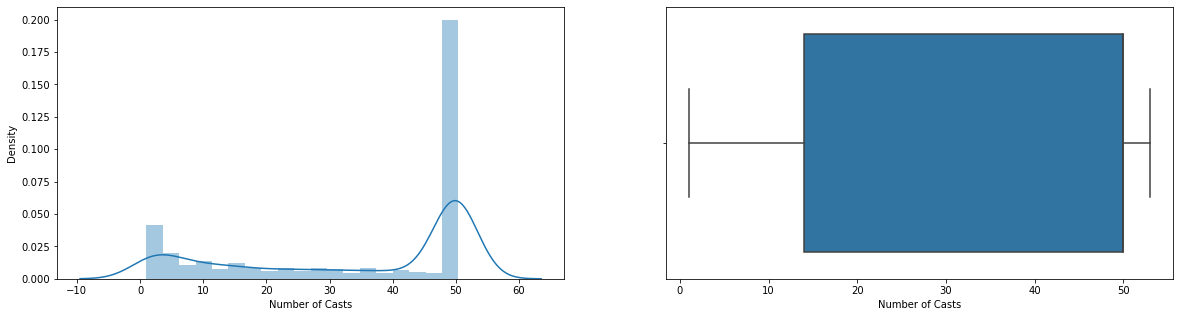

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_count_casts['Number of Casts'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_count_casts['Number of Casts'], ax = ax[1])
plt.show()

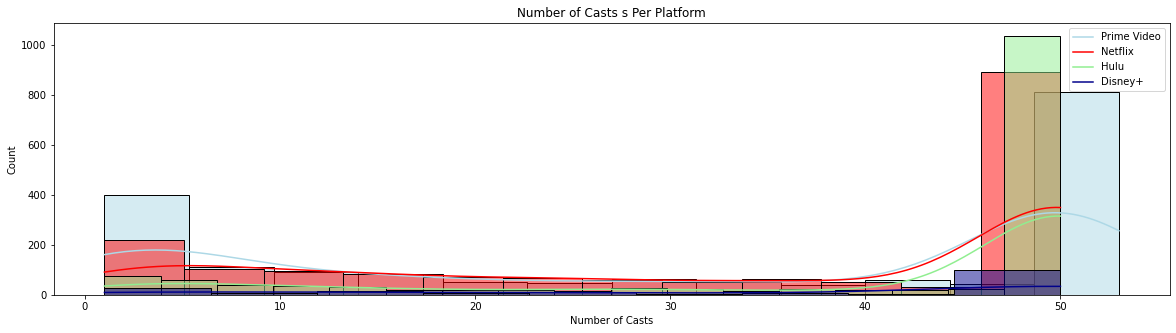

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Casts s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_casts_tvshows['Number of Casts'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_casts_tvshows['Number of Casts'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_casts_tvshows['Number of Casts'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_casts_tvshows['Number of Casts'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_tvshows_cast['Cast'].str.split(',').apply(pd.Series).stack()
del df_tvshows_cast['Cast']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Cast'
df_tvshows_cast = df_tvshows_cast.join(df_lan)
df_tvshows_cast.drop_duplicates(inplace = True)

In [49]:
df_tvshows_cast.head(5)

ID        Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   
0   1  Snowpiercer  2013  18  6.9              94        NA   

                         Genres        Country Language  ... Runtime  \
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...      60   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...      60   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...      60   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...      60   
0  Action,Drama,Sci-Fi,Thriller  United States  English  ...      60   

        Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
0  tv series       3       1     0            0        0     1   
0  tv series       3       1     0            0        0     1   
0  tv series       3       1     0            0        0     1   
0  tv series       3       1     0            0        0     1   
0  tv series       3       1     0            0        0     1   

   Service Provider           Cast  
0           Netflix   Daveed Diggs  
0           Netflix  Iddo Goldberg  
0           Netflix  Mickey Sumner  
0           Netflix  Alison Wright  
0           Netflix      Lena Hall  

[5 rows x 21 columns]

In [50]:
cast_count = df_tvshows_cast.groupby('Cast')['Title'].count()
cast_tvshows = df_tvshows_cast.groupby('Cast')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
cast_data_tvshows = pd.concat([cast_count, cast_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
cast_data_tvshows = cast_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [51]:
# Cast with TV Shows Counts - All Platforms Combined
cast_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Cast  TV Shows Count  Netflix  Hulu  Prime Video  \
24021         Dee Bradley Baker              94       24    30           11   
35047              Grey Griffin              87       26    34           15   
69189               Monica Rial              86       15    74           12   
53697  Kevin Michael Richardson              77       21    26            8   
31868           Fred Tatasciore              75       30    23            9   
59455            Luci Christian              71       14    55           15   
42855              Jeff Bennett              68       17    25            7   
93904                 Tom Kenny              64       15    30           10   
93613            Todd Haberkorn              62       30    41            4   
46461             John DiMaggio              61       21    26            4   

       Disney+  
24021       38  
35047       22  
69189        0  
53697       28  
31868       20  
59455        0  
42855       23  
93904       14  
93613        0  
46461       15

In [52]:
fig = px.bar(x = cast_data_tvshows['Cast'][:50],
             y = cast_data_tvshows['TV Shows Count'][:50], 
             color = cast_data_tvshows['TV Shows Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Cast', 'y' : 'TV Shows Count'},
             title  = 'Major Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [53]:
df_cast_high_tvshows = cast_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_cast_high_tvshows = df_cast_high_tvshows.drop(['index'], axis = 1)
# filter = (cast_data_tvshows['TV Shows Count'] == (cast_data_tvshows['TV Shows Count'].max()))
# df_cast_high_tvshows = cast_data_tvshows[filter]
 
# highest_rated_tvshows = cast_data_tvshows.loc[cast_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nCast with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_cast_high_tvshows.head(5)


Cast with Highest Ever TV Shows Count are : All Platforms Combined



Cast  TV Shows Count  Netflix  Hulu  Prime Video  \
0         Dee Bradley Baker              94       24    30           11   
1              Grey Griffin              87       26    34           15   
2               Monica Rial              86       15    74           12   
3  Kevin Michael Richardson              77       21    26            8   
4           Fred Tatasciore              75       30    23            9   

   Disney+  
0       38  
1       22  
2        0  
3       28  
4       20

In [54]:
fig = px.bar(y = df_cast_high_tvshows['Cast'][:15],
             x = df_cast_high_tvshows['TV Shows Count'][:15], 
             color = df_cast_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'TV Shows Count'},
             title  = 'Cast with Highest TV Shows : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [55]:
df_cast_low_tvshows = cast_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_cast_low_tvshows = df_cast_low_tvshows.drop(['index'], axis = 1)
# filter = (cast_data_tvshows['TV Shows Count'] == (cast_data_tvshows['TV Shows Count'].min()))
# df_cast_low_tvshows = cast_data_tvshows[filter]

print('\nCast with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_cast_low_tvshows.head(5)


Cast with Lowest Ever TV Shows Count are : All Platforms Combined



Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0      Pamela West               1        0     0            1        0
1   David Allister               1        0     0            1        0
2  David Altshuler               1        0     0            1        0
3   David Alvarado               1        1     0            0        0
4   David Andreoli               1        0     1            0        0

In [56]:
fig = px.bar(y = df_cast_low_tvshows['Cast'][:15],
             x = df_cast_low_tvshows['TV Shows Count'][:15], 
             color = df_cast_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'TV Shows Count'},
             title  = 'Cast with Lowest TV Shows Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [57]:
print(f'''
      Total '{cast_data_tvshows['Cast'].unique().shape[0]}' unique Cast Count s were Given, They were Like this,\n
      
      {cast_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Cast'].unique()[:5]}\n
 
      The Highest Ever TV Shows Count Ever Any TV Show Got is '{df_cast_high_tvshows['Cast'][0]}' : '{df_cast_high_tvshows['TV Shows Count'].max()}'\n
 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is '{df_cast_low_tvshows['Cast'][0]}' : '{df_cast_low_tvshows['TV Shows Count'].min()}'\n
      ''')


      Total '100452' unique Cast Count s were Given, They were Like this,

      
      ['Dee Bradley Baker' 'Grey Griffin' 'Monica Rial'
 'Kevin Michael Richardson' 'Fred Tatasciore']

 
      The Highest Ever TV Shows Count Ever Any TV Show Got is 'Dee Bradley Baker' : '94'

 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is 'Pamela West' : '1'

      


In [58]:
fig = px.pie(cast_data_tvshows[:10], names = 'Cast', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Cast')
fig.show()

In [59]:
# netflix_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_cast_tvshows = netflix_cast_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_cast_high_tvshows = df_cast_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_cast_high_tvshows = netflix_cast_high_tvshows.drop(['index'], axis = 1)
 
netflix_cast_low_tvshows = df_cast_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_cast_low_tvshows = netflix_cast_low_tvshows.drop(['index'], axis = 1)
 
netflix_cast_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Keith Silverstein              48       35    14            2        3
1        Cherami Leigh              52       34    24            3        0
2  Cristina Valenzuela              46       33    13            7        1
3      Erika Harlacher              41       32     9            3        0
4        Kyle McCarley              34       31     8            3        0

In [60]:
fig = px.bar(x = netflix_cast_high_tvshows['Cast'][:15],
             y = netflix_cast_high_tvshows['Netflix'][:15], 
             color = netflix_cast_high_tvshows['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'TV Shows Count'},
             title  = 'Cast with Highest TV Shows : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [61]:
# hulu_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_cast_tvshows = hulu_cast_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_cast_high_tvshows = df_cast_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_cast_high_tvshows = hulu_cast_high_tvshows.drop(['index'], axis = 1)
 
hulu_cast_low_tvshows = df_cast_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_cast_low_tvshows = hulu_cast_low_tvshows.drop(['index'], axis = 1)
 
hulu_cast_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0           Monica Rial              86       15    74           12        0
1        Luci Christian              71       14    55           15        0
2          Ian Sinclair              45        2    43            4        0
3  Colleen Clinkenbeard              44        8    42            1        0
4        Todd Haberkorn              62       30    41            4        0

In [62]:
fig = px.bar(x = hulu_cast_high_tvshows['Cast'][:15],
             y = hulu_cast_high_tvshows['Hulu'][:15], 
             color = hulu_cast_high_tvshows['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'TV Shows Count'},
             title  = 'Cast with Highest TV Shows : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [63]:
# prime_video_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_cast_tvshows = prime_video_cast_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_cast_high_tvshows = df_cast_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_cast_high_tvshows = prime_video_cast_high_tvshows.drop(['index'], axis = 1)
 
prime_video_cast_low_tvshows = df_cast_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_cast_low_tvshows = prime_video_cast_low_tvshows.drop(['index'], axis = 1)
 
prime_video_cast_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Grey Griffin              87       26    34           15       22
1    Frank Welker              54       10    15           15       18
2  Luci Christian              71       14    55           15        0
3     John Swasey              45       10    32           15        0
4     Monica Rial              86       15    74           12        0

In [64]:
fig = px.bar(x = prime_video_cast_high_tvshows['Cast'][:15],
             y = prime_video_cast_high_tvshows['Prime Video'][:15], 
             color = prime_video_cast_high_tvshows['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'TV Shows Count'},
             title  = 'Cast with Highest TV Shows : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [65]:
# disney_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_cast_tvshows = disney_cast_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_cast_high_tvshows = df_cast_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_cast_high_tvshows = disney_cast_high_tvshows.drop(['index'], axis = 1)
 
disney_cast_low_tvshows = df_cast_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_cast_low_tvshows = disney_cast_low_tvshows.drop(['index'], axis = 1)
 
disney_cast_high_tvshows.head(5)

Cast  TV Shows Count  Netflix  Hulu  Prime Video  \
0         Dee Bradley Baker              94       24    30           11   
1  Kevin Michael Richardson              77       21    26            8   
2              Jim Cummings              55        9    14            8   
3              Jeff Bennett              68       17    25            7   
4              Grey Griffin              87       26    34           15   

   Disney+  
0       38  
1       28  
2       25  
3       23  
4       22

In [66]:
fig = px.bar(x = disney_cast_high_tvshows['Cast'][:15],
             y = disney_cast_high_tvshows['Disney+'][:15], 
             color = disney_cast_high_tvshows['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Cast', 'x' : 'TV Shows Count'},
             title  = 'Cast with Highest TV Shows : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

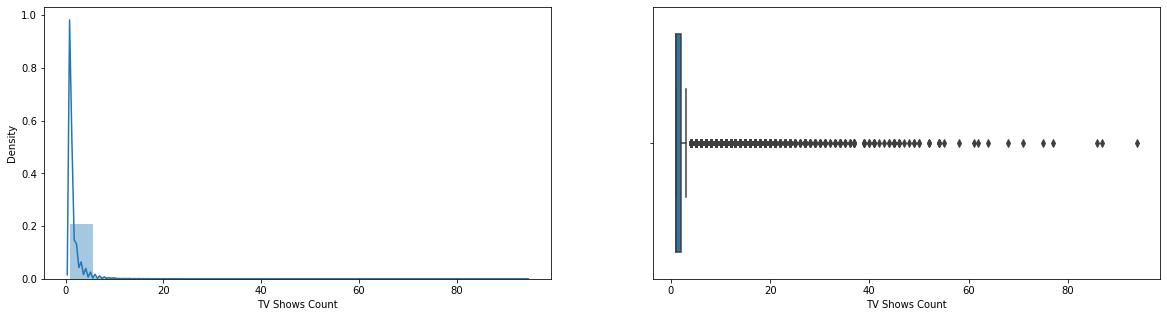

In [67]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(cast_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(cast_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [68]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_cast_tvshows = netflix_cast_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_cast_tvshows = hulu_cast_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_cast_tvshows = prime_video_cast_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_cast_tvshows = cast_data_tvshows[cast_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_cast_tvshows = disney_cast_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

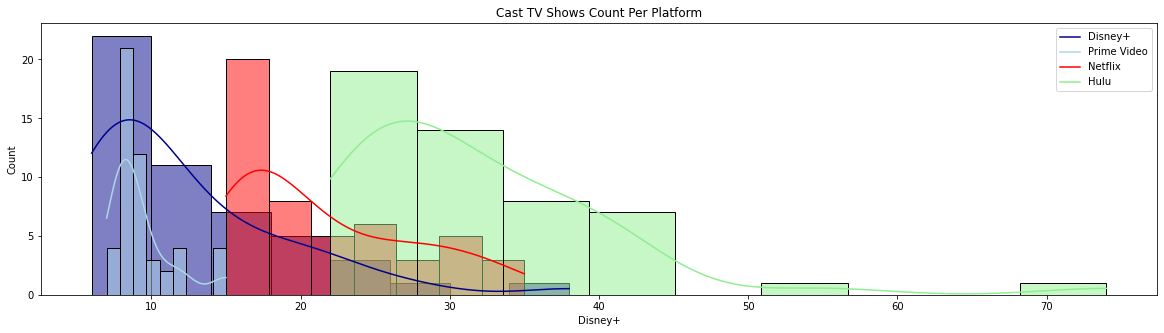

In [69]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Cast TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_cast_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_cast_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_cast_tvshows['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_cast_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [70]:
print(f'''
      The Cast with Highest TV Shows Count Ever Got is '{df_cast_high_tvshows['Cast'][0]}' : '{df_cast_high_tvshows['TV Shows Count'].max()}'\n
      The Cast with Lowest TV Shows Count Ever Got is '{df_cast_low_tvshows['Cast'][0]}' : '{df_cast_low_tvshows['TV Shows Count'].min()}'\n
      
      The Cast with Highest TV Shows Count on 'Netflix' is '{netflix_cast_high_tvshows['Cast'][0]}' : '{netflix_cast_high_tvshows['Netflix'].max()}'\n
      The Cast with Lowest TV Shows Count on 'Netflix' is '{netflix_cast_low_tvshows['Cast'][0]}' : '{netflix_cast_low_tvshows['Netflix'].min()}'\n
      
      The Cast with Highest TV Shows Count on 'Hulu' is '{hulu_cast_high_tvshows['Cast'][0]}' : '{hulu_cast_high_tvshows['Hulu'].max()}'\n
      The Cast with Lowest TV Shows Count on 'Hulu' is '{hulu_cast_low_tvshows['Cast'][0]}' : '{hulu_cast_low_tvshows['Hulu'].min()}'\n
      
      The Cast with Highest TV Shows Count on 'Prime Video' is '{prime_video_cast_high_tvshows['Cast'][0]}' : '{prime_video_cast_high_tvshows['Prime Video'].max()}'\n
      The Cast with Lowest TV Shows Count on 'Prime Video' is '{prime_video_cast_low_tvshows['Cast'][0]}' : '{prime_video_cast_low_tvshows['Prime Video'].min()}'\n
      
      The Cast with Highest TV Shows Count on 'Disney+' is '{disney_cast_high_tvshows['Cast'][0]}' : '{disney_cast_high_tvshows['Disney+'].max()}'\n
      The Cast with Lowest TV Shows Count on 'Disney+' is '{disney_cast_low_tvshows['Cast'][0]}' : '{disney_cast_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Cast with Highest TV Shows Count Ever Got is 'Dee Bradley Baker' : '94'

      The Cast with Lowest TV Shows Count Ever Got is 'Pamela West' : '1'

      
      The Cast with Highest TV Shows Count on 'Netflix' is 'Keith Silverstein' : '35'

      The Cast with Lowest TV Shows Count on 'Netflix' is 'Hiroki Totsuka' : '0'

      
      The Cast with Highest TV Shows Count on 'Hulu' is 'Monica Rial' : '74'

      The Cast with Lowest TV Shows Count on 'Hulu' is 'Þórunn Gunnlaugsdóttir' : '0'

      
      The Cast with Highest TV Shows Count on 'Prime Video' is 'Grey Griffin' : '15'

      The Cast with Lowest TV Shows Count on 'Prime Video' is 'Þórunn Gunnlaugsdóttir' : '0'

      
      The Cast with Highest TV Shows Count on 'Disney+' is 'Dee Bradley Baker' : '38'

      The Cast with Lowest TV Shows Count on 'Disney+' is 'Hiroki Totsuka' : '0'
 
      


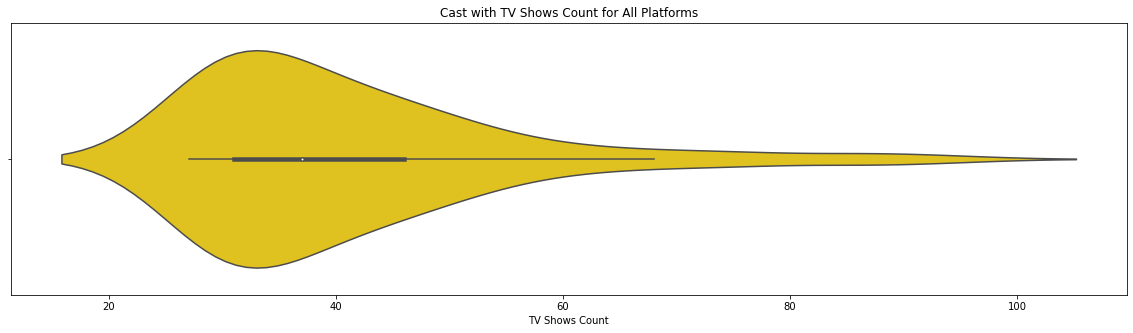

In [71]:
# Distribution of tvshows cast in each platform
plt.figure(figsize = (20, 5))
plt.title('Cast with TV Shows Count for All Platforms')
sns.violinplot(x = cast_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

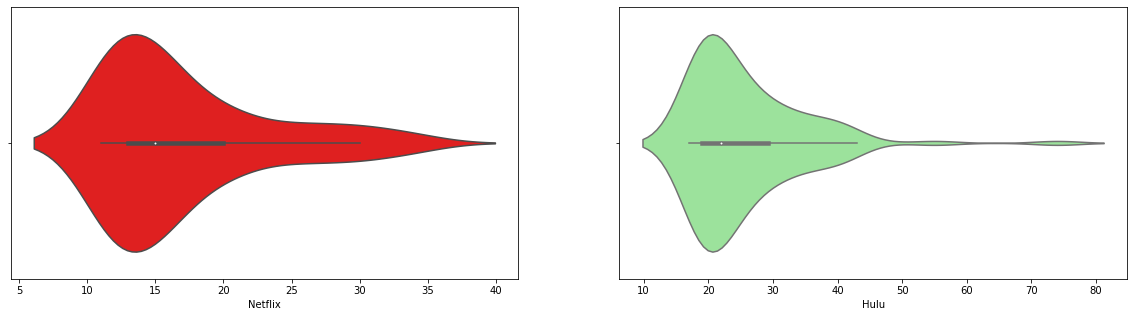

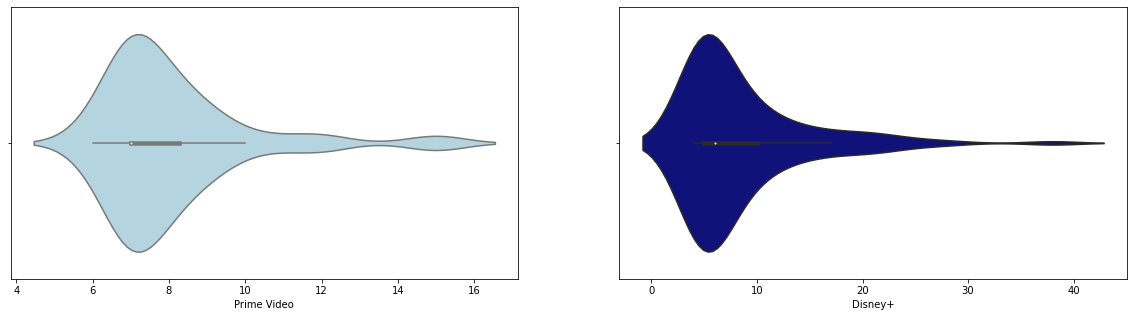

In [72]:
# Distribution of Cast TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_cast_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_cast_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_cast_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_cast_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [73]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Cast is '{round(cast_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Netflix' is '{round(netflix_cast_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Hulu' is '{round(hulu_cast_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Prime Video' is '{round(prime_video_cast_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Cast on 'Disney+' is '{round(disney_cast_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Cast is '1.67'

      The Average TV Shows Count of Cast on 'Netflix' is '1.35'

      The Average TV Shows Count of Cast on 'Hulu' is '1.51'

      The Average TV Shows Count of Cast on 'Prime Video' is '1.27'

      The Average TV Shows Count of Cast on 'Disney+' is '1.35'
 
      


In [74]:
print(f'''
      Accross All Platforms Total Count of Cast is '{cast_data_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Netflix' is '{netflix_cast_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Hulu' is '{hulu_cast_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_cast_tvshows['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Disney+' is '{disney_cast_tvshows['Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '100452'

      Total Count of Cast on 'Netflix' is '44475'

      Total Count of Cast on 'Hulu' is '39921'

      Total Count of Cast on 'Prime Video' is '44367'

      Total Count of Cast on 'Disney+' is '4697'
 
      


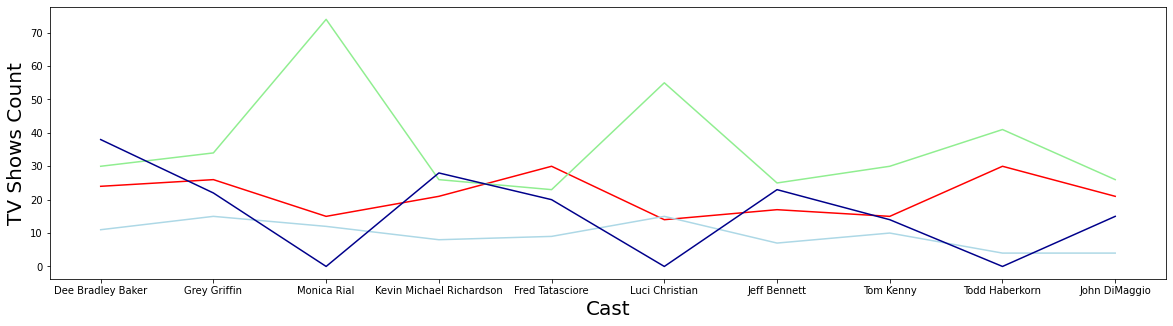

In [75]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = cast_data_tvshows['Cast'][:10], y = cast_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = cast_data_tvshows['Cast'][:10], y = cast_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = cast_data_tvshows['Cast'][:10], y = cast_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = cast_data_tvshows['Cast'][:10], y = cast_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Cast', fontsize = 20)
plt.ylabel('TV Shows Count', fontsize = 20)
plt.show()

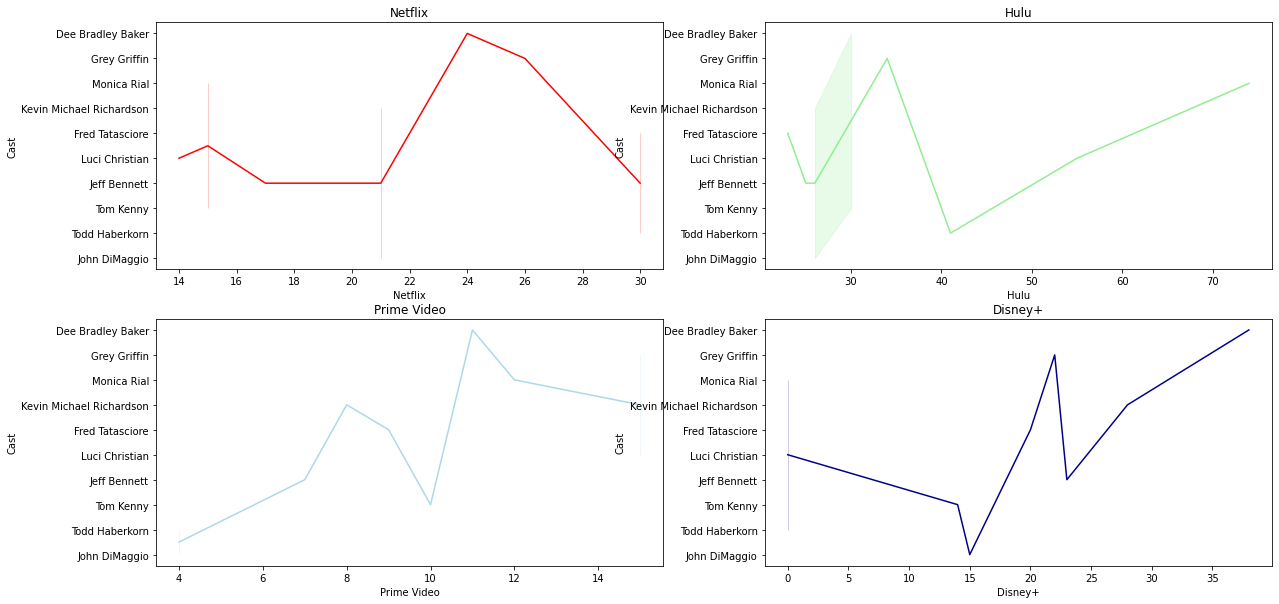

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_c_ax1 = sns.lineplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_c_ax2 = sns.lineplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_c_ax3 = sns.lineplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_c_ax4 = sns.lineplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

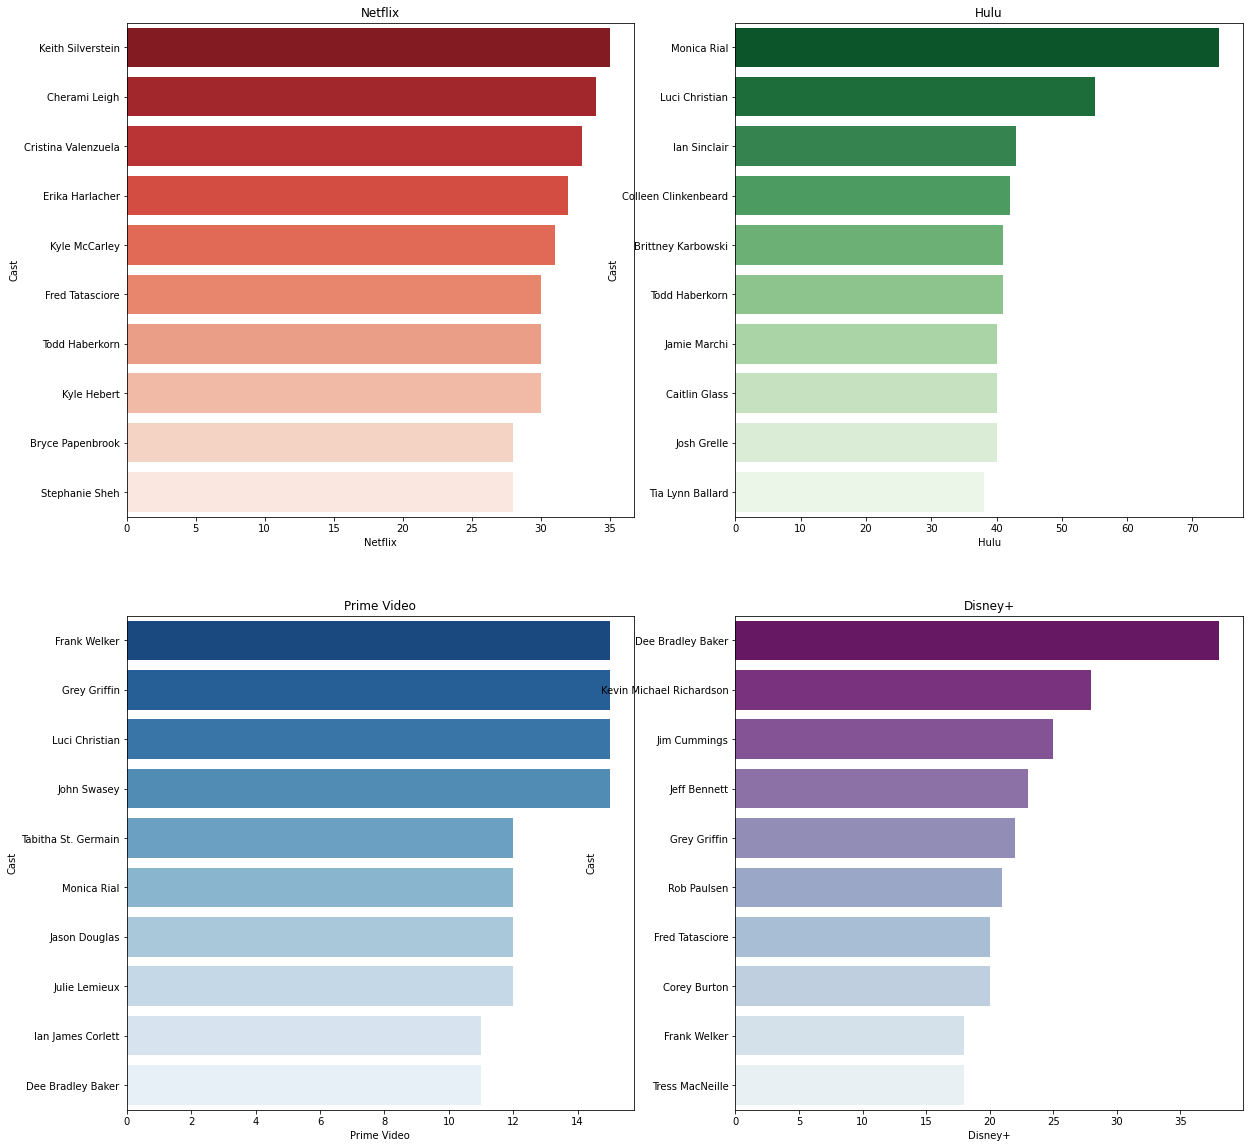

In [77]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_c_ax1 = sns.barplot(y = netflix_cast_tvshows['Cast'][:10], x = netflix_cast_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_c_ax2 = sns.barplot(y = hulu_cast_tvshows['Cast'][:10], x = hulu_cast_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_c_ax3 = sns.barplot(y = prime_video_cast_tvshows['Cast'][:10], x = prime_video_cast_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_c_ax4 = sns.barplot(y = disney_cast_tvshows['Cast'][:10], x = disney_cast_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

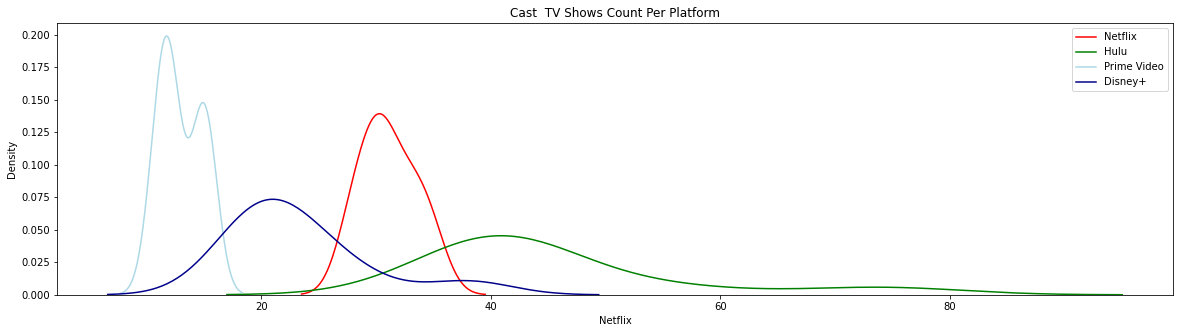

In [78]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Cast  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_cast_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_cast_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_cast_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_cast_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

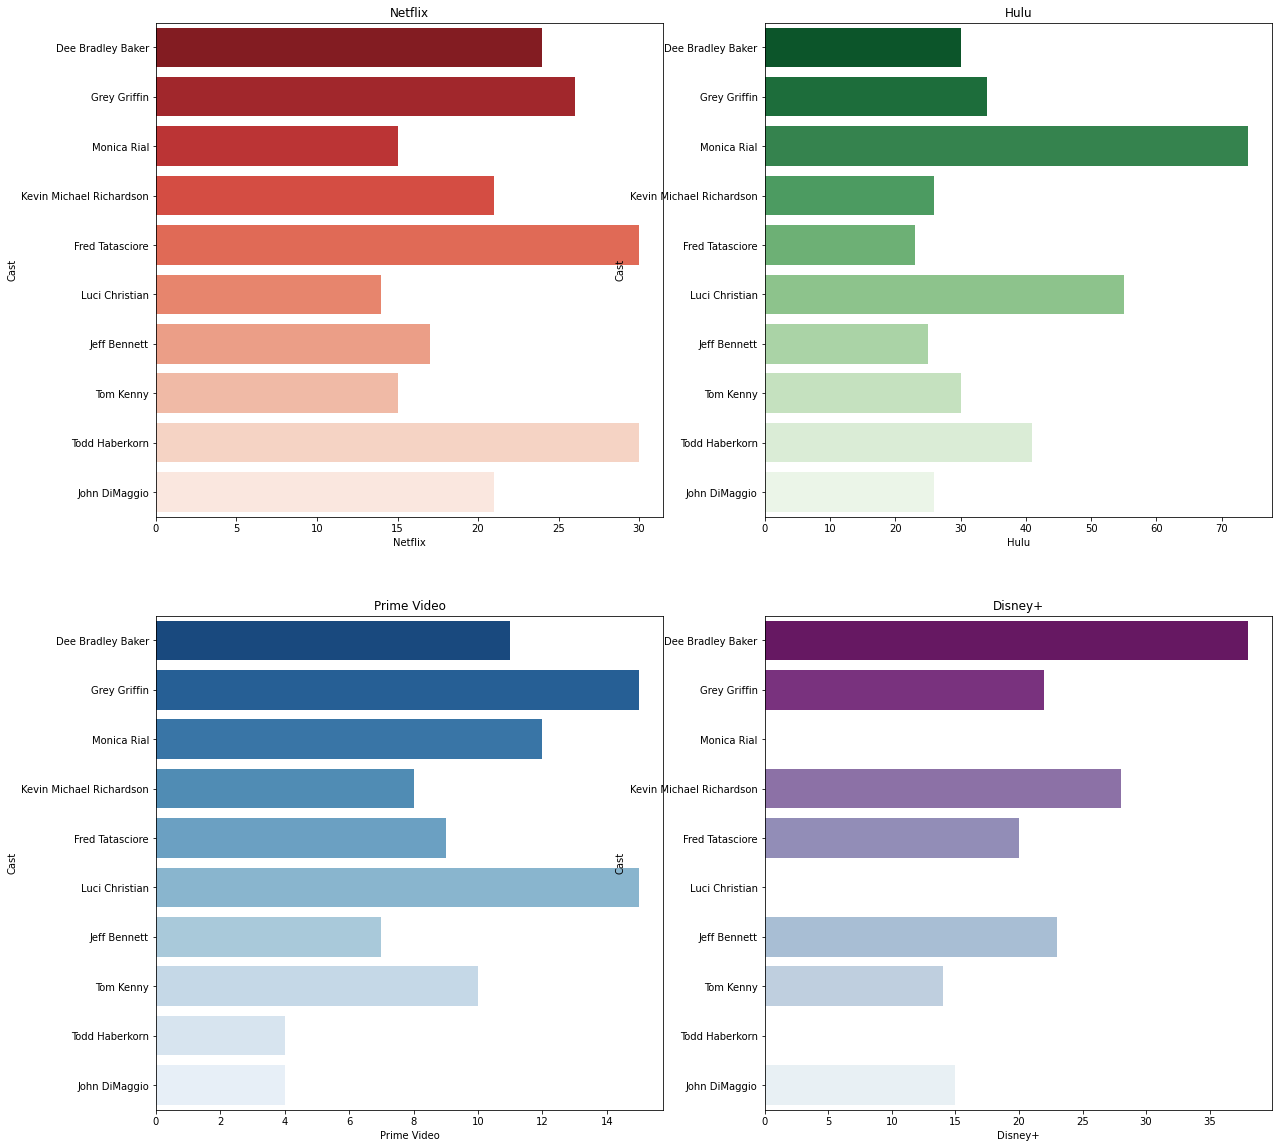

In [79]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_c_ax1 = sns.barplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_c_ax2 = sns.barplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_c_ax3 = sns.barplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_c_ax4 = sns.barplot(y = cast_data_tvshows['Cast'][:10], x = cast_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

In [80]:
df_tvshows_mixed_casts.drop(df_tvshows_mixed_casts.loc[df_tvshows_mixed_casts['Cast'] == "NA"].index, inplace = True)
# df_tvshows_mixed_casts = df_tvshows_mixed_casts[df_tvshows_mixed_casts.Cast != "NA"]
df_tvshows_mixed_casts.drop(df_tvshows_mixed_casts.loc[df_tvshows_mixed_casts['Number of Casts'] == 1].index, inplace = True)

In [81]:
df_tvshows_mixed_casts.head(5)

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

  Runtime       Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0      60  tv series       3       1    0            0        0     1   
1      22  tv series      18       1    0            0        0     1   
2      52  tv series       2       1    0            0        0     1   
3      60  tv series       6       1    0            1        1     1   
4      30  tv series       3       1    0            0        0     1   

   Service Provider  Number of Casts  
0           Netflix               50  
1           Netflix               50  
2           Netflix               50  
3           Netflix               50  
4           Netflix               50  

[5 rows x 22 columns]

In [82]:
mixed_casts_count = df_tvshows_mixed_casts.groupby('Cast')['Title'].count()
mixed_casts_tvshows = df_tvshows_mixed_casts.groupby('Cast')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_casts_data_tvshows = pd.concat([mixed_casts_count, mixed_casts_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count', 'Cast' : 'Mixed Cast'})
mixed_casts_data_tvshows = mixed_casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [83]:
mixed_casts_data_tvshows.head(5)

Mixed Cast  TV Shows Count  \
3062  Michela Luci,Nicolas Aqui,Jamie Watson,Eric Pe...               4   
4231  Tom Waes,Frank Lammers,Manou Kersting,Anna Dri...               3   
1450  Frank Grillo,Kiele Sanchez,Matt Lauria,Jonatha...               3   
3017  Michael Chiklis,Catherine Dent,Walton Goggins,...               3   
2499  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...               3   

      Netflix  Hulu  Prime Video  Disney+  
3062        4     0            0        0  
4231        1     0            2        0  
1450        1     2            0        0  
3017        0     1            2        0  
2499        1     0            2        0

In [84]:
# Mixed Cast with TV Shows Counts - All Platforms Combined
mixed_casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Mixed Cast  TV Shows Count  \
3062  Michela Luci,Nicolas Aqui,Jamie Watson,Eric Pe...               4   
1450  Frank Grillo,Kiele Sanchez,Matt Lauria,Jonatha...               3   
3017  Michael Chiklis,Catherine Dent,Walton Goggins,...               3   
2499  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...               3   
739   Charlie Day,Glenn Howerton,Rob McElhenney,Kait...               3   
4231  Tom Waes,Frank Lammers,Manou Kersting,Anna Dri...               3   
4132  Telly Savalas,Dan Frazer,Kevin Dobson,George S...               2   
4340  Victor Rasuk,Nathalie Kelley,Dan Bucatinsky,Da...               2   
3782  Sanjeev Bhaskar,Jordan Long,Lewis Reeves,Nicol...               2   
225   Anders W. Berthelsen,Zofia Wichlacz,Charlotte ...               2   

      Netflix  Hulu  Prime Video  Disney+  
3062        4     0            0        0  
1450        1     2            0        0  
3017        0     1            2        0  
2499        1     0            2        0  
739         1     1            1        0  
4231        1     0            2        0  
4132        0     2            0        0  
4340        0     1            1        0  
3782        1     0            1        0  
225         0     0            2        0

In [85]:
df_mixed_casts_high_tvshows = mixed_casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_mixed_casts_high_tvshows = df_mixed_casts_high_tvshows.drop(['index'], axis = 1)
# filter = (mixed_casts_data_tvshows['TV Shows Count'] = =  (mixed_casts_data_tvshows['TV Shows Count'].max()))
# df_mixed_casts_high_tvshows = mixed_casts_data_tvshows[filter]
 
# highest_rated_tvshows = mixed_casts_data_tvshows.loc[mixed_casts_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nMixed Cast with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_casts_high_tvshows.head(5)


Mixed Cast with Highest Ever TV Shows Count are : All Platforms Combined



Mixed Cast  TV Shows Count  Netflix  \
0  Michela Luci,Nicolas Aqui,Jamie Watson,Eric Pe...               4        4   
1  Frank Grillo,Kiele Sanchez,Matt Lauria,Jonatha...               3        1   
2  Michael Chiklis,Catherine Dent,Walton Goggins,...               3        0   
3  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...               3        1   
4  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...               3        1   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     2            0        0  
2     1            2        0  
3     0            2        0  
4     1            1        0

In [86]:
fig = px.bar(y = df_mixed_casts_high_tvshows['Mixed Cast'][:15],
             x = df_mixed_casts_high_tvshows['TV Shows Count'][:15], 
             color = df_mixed_casts_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Cast'},
             title  = 'TV Shows with Highest Number of Mixed Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [87]:
df_mixed_casts_low_tvshows = mixed_casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_mixed_casts_low_tvshows = df_mixed_casts_low_tvshows.drop(['index'], axis = 1)
# filter = (mixed_casts_data_tvshows['TV Shows Count'] = =  (mixed_casts_data_tvshows['TV Shows Count'].min()))
# df_mixed_casts_low_tvshows = mixed_casts_data_tvshows[filter]
 
print('\nMixed Cast with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_casts_low_tvshows.head(5)


Mixed Cast with Lowest Ever TV Shows Count are : All Platforms Combined



Mixed Cast  TV Shows Count  Netflix  \
0  Saloma Furlong,Anna,Naomi Kramer,Levi Shetler,...               1        0   
1  Aden Young,Abigail Spencer,J. Smith-Cameron,Ad...               1        1   
2  Aden Young,Sam Trammell,Simone Kessell,Milly A...               1        1   
3  Adewale Akinnuoye-Agbaje,Angela Trimbur,John B...               1        0   
4  Aditi Sudhir Pohankar,Vijay Varma,Vishwas Kini...               1        1   

   Hulu  Prime Video  Disney+  
0     0            1        0  
1     0            0        0  
2     0            0        0  
3     1            0        0  
4     0            0        0

In [88]:
fig = px.bar(y = df_mixed_casts_low_tvshows['Mixed Cast'][:15],
             x = df_mixed_casts_low_tvshows['TV Shows Count'][:15], 
             color = df_mixed_casts_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Cast'},
             title  = 'TV Shows with Lowest Number of Mixed Casts : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [89]:
print(f'''
      Total '{df_tvshows_casts['Cast'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{mixed_casts_data_tvshows['Mixed Cast'].unique().shape[0]}' Mixed Cast, They were Like this, \n
 
      {mixed_casts_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Mixed Cast'].head(5).unique()} etc. \n
 
      The Mixed Cast with Highest TV Shows Count have '{mixed_casts_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_mixed_casts_high_tvshows['Mixed Cast'][0]}', &\n
      The Mixed Cast with Lowest TV Shows Count have '{mixed_casts_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_mixed_casts_low_tvshows['Mixed Cast'][0]}'
      ''')


      Total '4946' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '4546' Mixed Cast, They were Like this, 

 
      ['Michela Luci,Nicolas Aqui,Jamie Watson,Eric Peterson,Dante Zee,Anna Claire Bartlam,Julie Lemieux,Cory Doran,Stephany Seki,Jonathan Tan,Addison Holley,Brandon McGibbon,T.J. McGibbon,Derek McGrath,Robert Knorr'
 "Frank Grillo,Kiele Sanchez,Matt Lauria,Jonathan Tucker,Nick Jonas,Joanna Going,Juliette Jackson,Paul Walter Hauser,Joe Stevenson,Mac Brandt,Natalie Martinez,Levi Bowling,Juan Archuleta,Bryan Callen,Mike Beltran,Christie Philips,Kirk Acevedo,Lina Esco,Phil Abrams,Wendy Moniz-Grillo,Katherine Hughes,Jonathan Howard,Jamie Harris,Kenny Florian,Dean Stone,M.C. Gainey,Kim Robillard,Alisa Allapach,Jessica Szohr,Mark Consuelos,Roddy Rieger,Ahna O'Reilly,Bruce Davison,Ronnie Gene Blevins,Adam Shapiro,Mario Perez,Michael Stoyanov,Ishmel Sahid,Sean Quezada,Zuleikha Robinson,Obba Babatundé,Meaghan Rath,Michael Graziadei,

In [90]:
fig = px.pie(mixed_casts_data_tvshows[:10], names = 'Mixed Cast', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Mixed Cast')
fig.show()

In [91]:
# netflix_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_casts_tvshows = netflix_mixed_casts_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_mixed_casts_high_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_casts_high_tvshows = netflix_mixed_casts_high_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_casts_low_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_casts_low_tvshows = netflix_mixed_casts_low_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_casts_high_tvshows.head(5)

Mixed Cast  TV Shows Count  Netflix  \
0  Michela Luci,Nicolas Aqui,Jamie Watson,Eric Pe...               4        4   
1  Lee Min-Ho,Park Shin-Hye,Woo-bin Kim,Kim Ji-Wo...               2        2   
2  Ben Diskin,Shinnosuke Mitsushima,Michelle Ruff...               2        2   
3  Jonah Hill,Emma Stone,Sonoya Mizuno,Justin The...               2        2   
4  Alessandro Borghi,Giacomo Ferrara,Filippo Nigr...               2        2   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            0        0  
2     1            0        0  
3     0            0        0  
4     0            0        0

In [92]:
# hulu_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_casts_tvshows = hulu_mixed_casts_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_mixed_casts_high_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_casts_high_tvshows = hulu_mixed_casts_high_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_casts_low_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_casts_low_tvshows = hulu_mixed_casts_low_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_casts_high_tvshows.head(5)

Mixed Cast  TV Shows Count  Netflix  \
0  Rebecca Romijn,Christian Kane,Lindy Booth,John...               2        0   
1  Michael Strahan,Sara Haines,Keke Palmer,Kenya ...               2        0   
2  Randall Park,Constance Wu,Hudson Yang,Forrest ...               2        0   
3  Katie Gray,Crispin Freeman,Victoria Harwood,Ra...               2        0   
4  Anna Maxwell Martin,Denis Lawson,Carey Mulliga...               2        0   

   Hulu  Prime Video  Disney+  
0     2            0        0  
1     2            0        0  
2     2            0        0  
3     2            0        0  
4     2            1        0

In [93]:
# prime_video_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_casts_tvshows = prime_video_mixed_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_mixed_casts_high_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_casts_high_tvshows = prime_video_mixed_casts_high_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_casts_low_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_casts_low_tvshows = prime_video_mixed_casts_low_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_casts_high_tvshows.head(5)

Mixed Cast  TV Shows Count  Netflix  \
0  Kate Mulgrew,Robert Beltran,Roxann Dawson,Robe...               2        1   
1  Jack Whitehall,Rosie Perez,Christian Ochoa,Cha...               2        0   
2  Bill Cosby,Phylicia Rashad,Keshia Knight Pulli...               2        0   
3  Maryke Hendrikse,Stephanie Komure,Marlo Flanag...               2        0   
4  Helen Mirren,Hugh Dancy,Toby Jones,Patrick Mal...               2        0   

   Hulu  Prime Video  Disney+  
0     1            2        0  
1     0            2        0  
2     0            2        0  
3     0            2        0  
4     0            2        0

In [94]:
# disney_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_casts_tvshows = disney_mixed_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_mixed_casts_high_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_casts_high_tvshows = disney_mixed_casts_high_tvshows.drop(['index'], axis = 1)
 
disney_mixed_casts_low_tvshows = df_mixed_casts_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_casts_low_tvshows = disney_mixed_casts_low_tvshows.drop(['index'], axis = 1)
 
disney_mixed_casts_high_tvshows.head(5)

Mixed Cast  TV Shows Count  Netflix  \
0  Mandy Moore,Zachary Levi,Eden Espinosa,Paul F....               2        0   
1  David Tennant,Ben Schwartz,Danny Pudi,Bobby Mo...               2        0   
2  Blake Anderson,Tyree Brown,David Cowgill,Jenni...               1        0   
3  Rich Collins,Scott Durbin,David Poche,Wendy Ca...               1        0   
4  Angelica Bolognesi Bonacini,Jim Cummings,Chloë...               1        0   

   Hulu  Prime Video  Disney+  
0     0            0        2  
1     0            0        2  
2     0            0        1  
3     0            0        1  
4     0            0        1

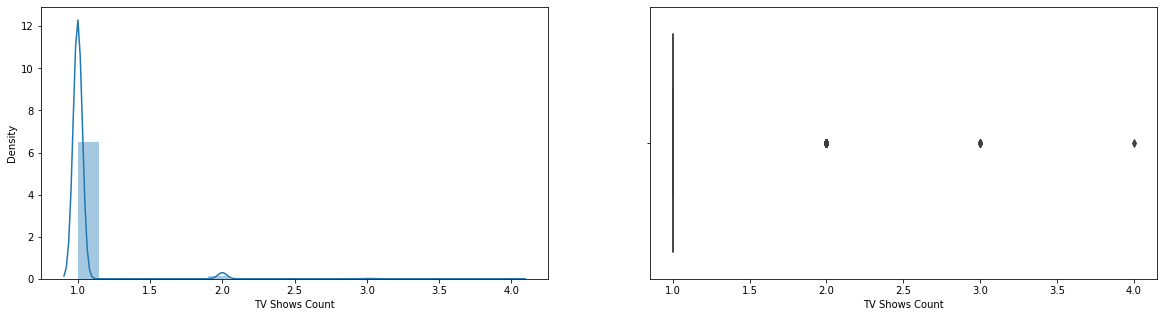

In [95]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_casts_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_casts_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [96]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_casts_tvshows = netflix_mixed_casts_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_casts_tvshows = hulu_mixed_casts_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_casts_tvshows = prime_video_mixed_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_mixed_casts_tvshows = mixed_casts_data_tvshows[mixed_casts_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_casts_tvshows = disney_mixed_casts_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

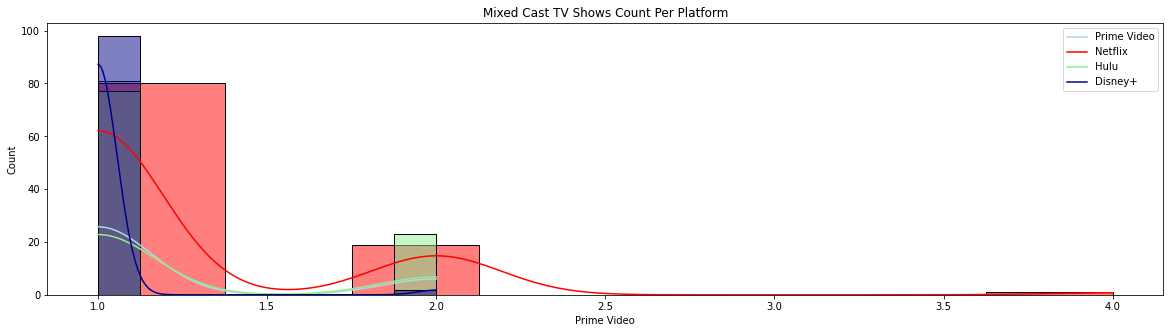

In [97]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Cast TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_casts_tvshows['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_casts_tvshows['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_casts_tvshows['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_casts_tvshows['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [98]:
print(f'''
      The Mixed Cast with Highest TV Shows Count Ever Got is '{df_mixed_casts_high_tvshows['Mixed Cast'][0]}' : '{df_mixed_casts_high_tvshows['TV Shows Count'].max()}'\n
      The Mixed Cast with Lowest TV Shows Count Ever Got is '{df_mixed_casts_low_tvshows['Mixed Cast'][0]}' : '{df_mixed_casts_low_tvshows['TV Shows Count'].min()}'\n
      
      The Mixed Cast with Highest TV Shows Count on 'Netflix' is '{netflix_mixed_casts_high_tvshows['Mixed Cast'][0]}' : '{netflix_mixed_casts_high_tvshows['Netflix'].max()}'\n
      The Mixed Cast with Lowest TV Shows Count on 'Netflix' is '{netflix_mixed_casts_low_tvshows['Mixed Cast'][0]}' : '{netflix_mixed_casts_low_tvshows['Netflix'].min()}'\n
      
      The Mixed Cast with Highest TV Shows Count on 'Hulu' is '{hulu_mixed_casts_high_tvshows['Mixed Cast'][0]}' : '{hulu_mixed_casts_high_tvshows['Hulu'].max()}'\n
      The Mixed Cast with Lowest TV Shows Count on 'Hulu' is '{hulu_mixed_casts_low_tvshows['Mixed Cast'][0]}' : '{hulu_mixed_casts_low_tvshows['Hulu'].min()}'\n
      
      The Mixed Cast with Highest TV Shows Count on 'Prime Video' is '{prime_video_mixed_casts_high_tvshows['Mixed Cast'][0]}' : '{prime_video_mixed_casts_high_tvshows['Prime Video'].max()}'\n
      The Mixed Cast with Lowest TV Shows Count on 'Prime Video' is '{prime_video_mixed_casts_low_tvshows['Mixed Cast'][0]}' : '{prime_video_mixed_casts_low_tvshows['Prime Video'].min()}'\n
      
      The Mixed Cast with Highest TV Shows Count on 'Disney+' is '{disney_mixed_casts_high_tvshows['Mixed Cast'][0]}' : '{disney_mixed_casts_high_tvshows['Disney+'].max()}'\n
      The Mixed Cast with Lowest TV Shows Count on 'Disney+' is '{disney_mixed_casts_low_tvshows['Mixed Cast'][0]}' : '{disney_mixed_casts_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Mixed Cast with Highest TV Shows Count Ever Got is 'Michela Luci,Nicolas Aqui,Jamie Watson,Eric Peterson,Dante Zee,Anna Claire Bartlam,Julie Lemieux,Cory Doran,Stephany Seki,Jonathan Tan,Addison Holley,Brandon McGibbon,T.J. McGibbon,Derek McGrath,Robert Knorr' : '4'

      The Mixed Cast with Lowest TV Shows Count Ever Got is 'Saloma Furlong,Anna,Naomi Kramer,Levi Shetler,Jan Edwards,Paul Edwards,Joe Keim,Bart Fletcher' : '1'

      
      The Mixed Cast with Highest TV Shows Count on 'Netflix' is 'Michela Luci,Nicolas Aqui,Jamie Watson,Eric Peterson,Dante Zee,Anna Claire Bartlam,Julie Lemieux,Cory Doran,Stephany Seki,Jonathan Tan,Addison Holley,Brandon McGibbon,T.J. McGibbon,Derek McGrath,Robert Knorr' : '4'

      The Mixed Cast with Lowest TV Shows Count on 'Netflix' is 'Josh Friesen,Caitlynne Medrek,Nikki Rae Hallow,Nathan Hunt' : '0'

      
      The Mixed Cast with Highest TV Shows Count on 'Hulu' is 'Rebecca Romijn,Christian Kane,Lindy Booth,John Harlan Kim,John Larr

In [99]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Mixed Cast is '{round(mixed_casts_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Cast on 'Netflix' is '{round(netflix_mixed_casts_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Cast on 'Hulu' is '{round(hulu_mixed_casts_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Cast on 'Prime Video' is '{round(prime_video_mixed_casts_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Cast on 'Disney+' is '{round(disney_mixed_casts_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Mixed Cast is '1.03'

      The Average TV Shows Count of Mixed Cast on 'Netflix' is '1.01'

      The Average TV Shows Count of Mixed Cast on 'Hulu' is '1.02'

      The Average TV Shows Count of Mixed Cast on 'Prime Video' is '1.01'

      The Average TV Shows Count of Mixed Cast on 'Disney+' is '1.01'
 
      


In [100]:
print(f'''
      Accross All Platforms Total Count of Mixed Cast is '{mixed_casts_data_tvshows['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Netflix' is '{netflix_mixed_casts_tvshows['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Hulu' is '{hulu_mixed_casts_tvshows['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Prime Video' is '{prime_video_mixed_casts_tvshows['Mixed Cast'].unique().shape[0]}'\n
      Total Count of Mixed Cast on 'Disney+' is '{disney_mixed_casts_tvshows['Mixed Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Cast is '4546'

      Total Count of Mixed Cast on 'Netflix' is '1698'

      Total Count of Mixed Cast on 'Hulu' is '1438'

      Total Count of Mixed Cast on 'Prime Video' is '1658'

      Total Count of Mixed Cast on 'Disney+' is '167'
 
      


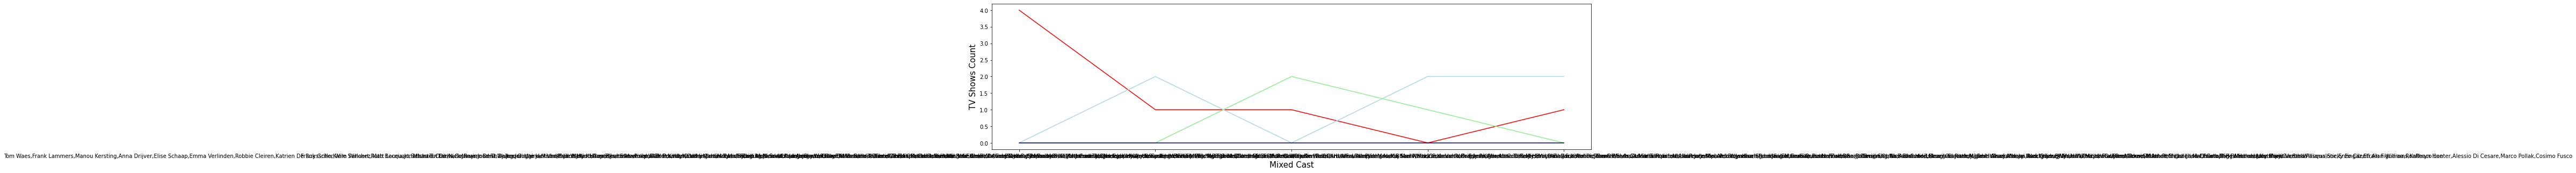

In [101]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:5], y = mixed_casts_data_tvshows['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:5], y = mixed_casts_data_tvshows['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:5], y = mixed_casts_data_tvshows['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:5], y = mixed_casts_data_tvshows['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Cast', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

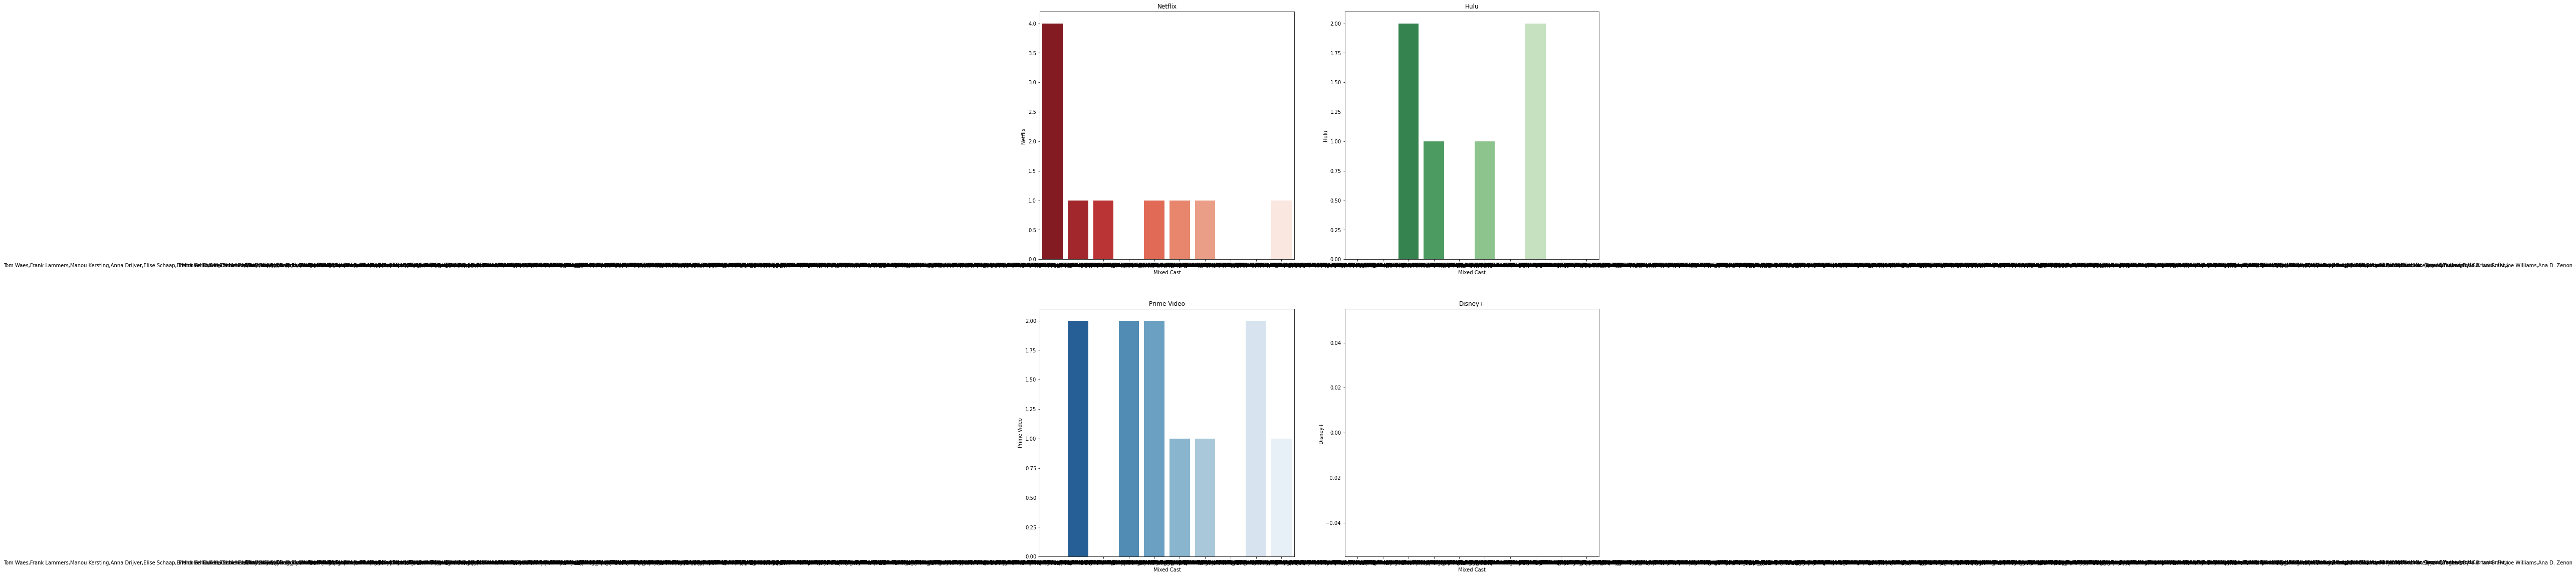

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_c_ax1 = sns.barplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_c_ax2 = sns.barplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_c_ax3 = sns.barplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_c_ax4 = sns.barplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

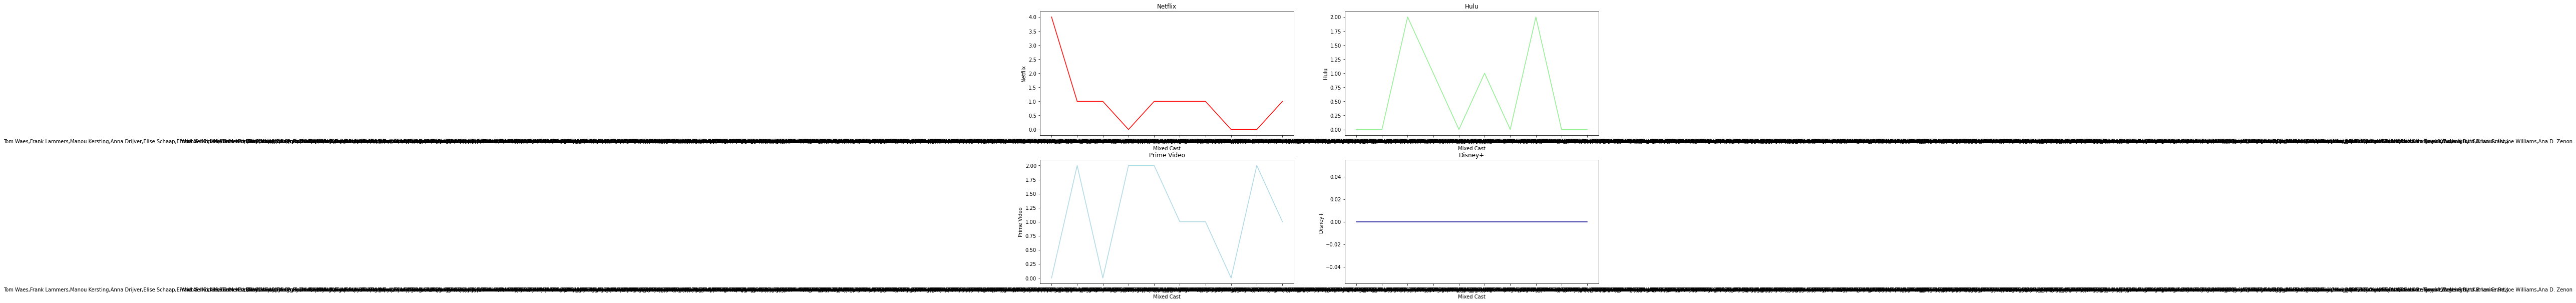

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_mc_ax1 = sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_mc_ax2 = sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_mc_ax3 = sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_mc_ax4 = sns.lineplot(x = mixed_casts_data_tvshows['Mixed Cast'][:10], y = mixed_casts_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mc_ax1.title.set_text(labels[0])
h_mc_ax2.title.set_text(labels[1])
p_mc_ax3.title.set_text(labels[2])
d_mc_ax4.title.set_text(labels[3])
 
plt.show()

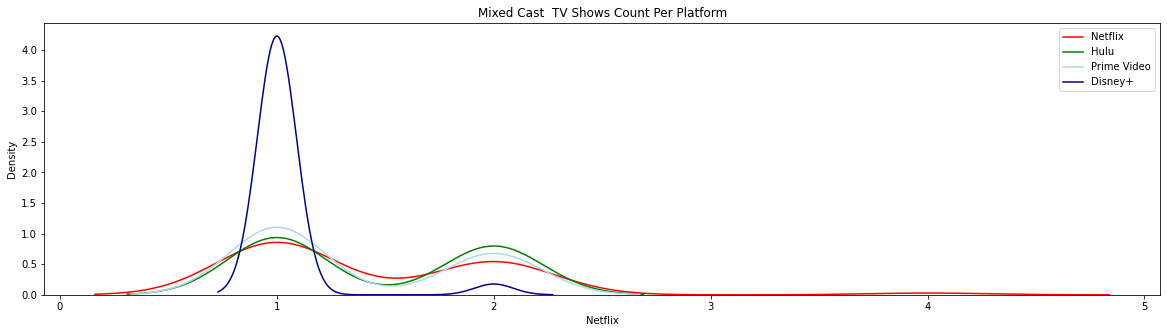

In [104]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Cast  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_casts_tvshows['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_casts_tvshows['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_casts_tvshows['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_casts_tvshows['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

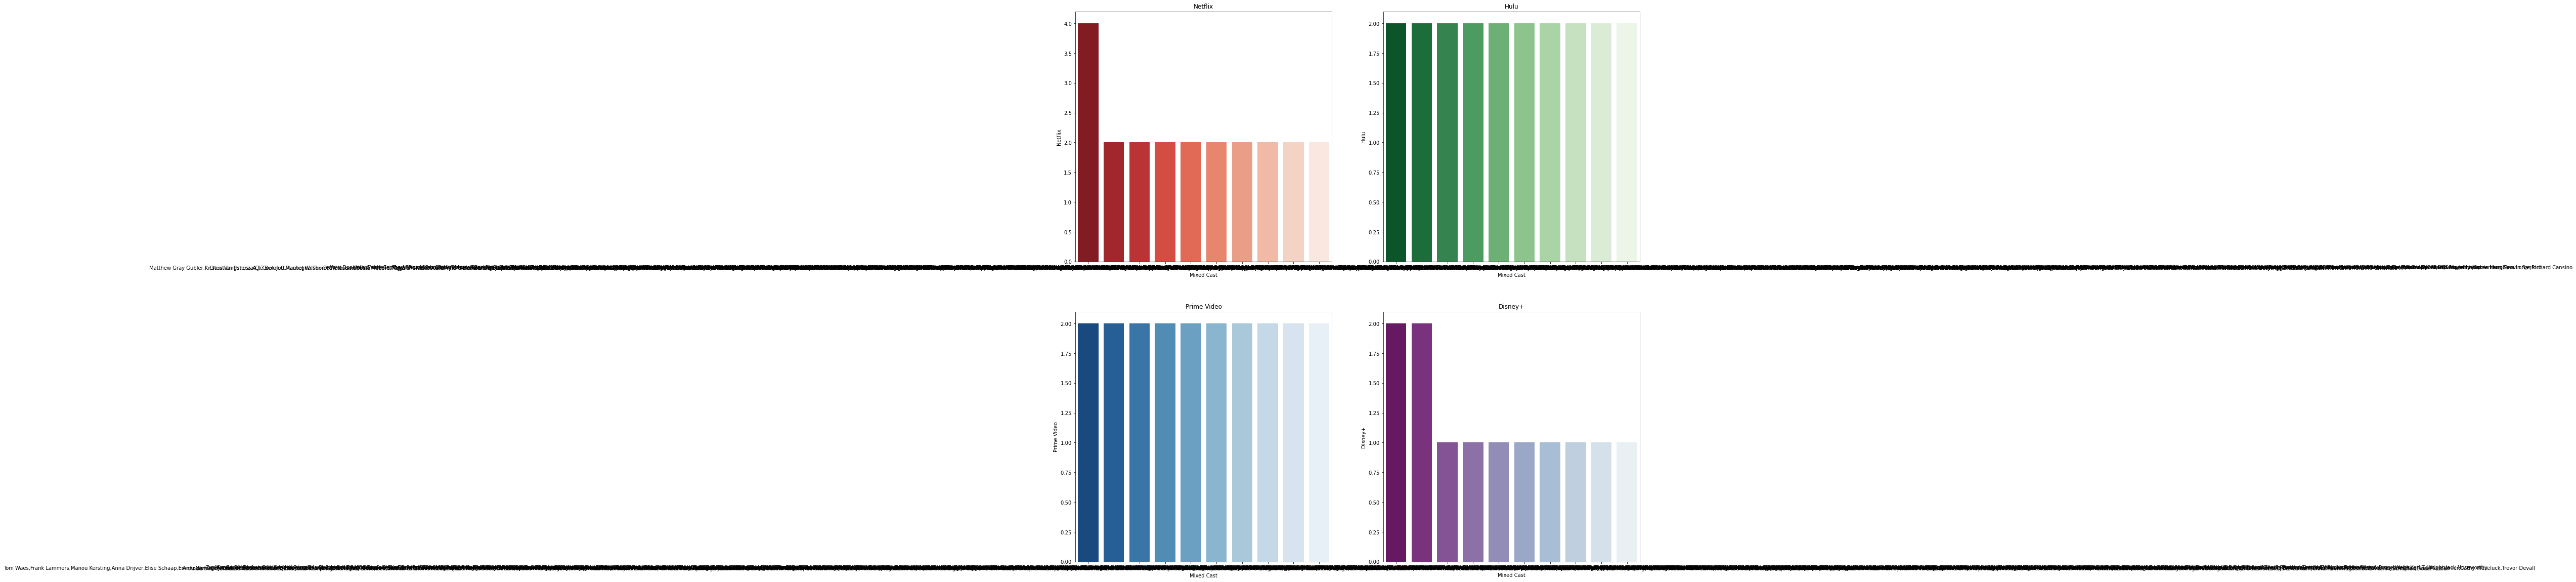

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_mc_ax1 = sns.barplot(x = netflix_mixed_casts_tvshows['Mixed Cast'][:10], y = netflix_mixed_casts_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_mc_ax2 = sns.barplot(x = hulu_mixed_casts_tvshows['Mixed Cast'][:10], y = hulu_mixed_casts_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_mc_ax3 = sns.barplot(x = prime_video_mixed_casts_tvshows['Mixed Cast'][:10], y = prime_video_mixed_casts_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_mc_ax4 = sns.barplot(x = disney_mixed_casts_tvshows['Mixed Cast'][:10], y = disney_mixed_casts_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mc_ax1.title.set_text(labels[0])
h_mc_ax2.title.set_text(labels[1])
p_mc_ax3.title.set_text(labels[2])
d_mc_ax4.title.set_text(labels[3])
 
plt.show()

In [106]:
fig = go.Figure(go.Funnel(y = mixed_casts_data_tvshows['Mixed Cast'][:10], x = mixed_casts_data_tvshows['TV Shows Count'][:10]))
fig.show()